# Exp 60-66 analysis

Several tests of the replicator opt method, comparing `num_replicators` to `num_iterations` (the number of replication events). Here, `metric=total_E`.

See `./informercial/Makefile` for full experimental details.

In [2]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import meta_bandit
from infomercial.local_gym import bandit
from infomercial.exp.meta_bandit import load_checkpoint

import gym

In [3]:
# ls ../data/exp2*

# Load and process data

In [40]:
data_path ="/Users/qualia/Code/infomercial/data/"
exp_names = ["exp60", "exp61", "exp62", 
             "exp63", "exp64", "exp65", 
             "exp66"]
num_iterations = [16, 2, 4, 
                  8, 16, 8, 
                 4]
num_replicators = [40, 400, 400,
                  400, 400, 40,
                  40]

best_params = []
ties = []
total_Es = []
lrs = []
total_Rs = []
for exp_name, i, r in zip(exp_names, num_iterations, num_replicators):
    best = load_checkpoint(os.path.join(data_path, f"{exp_name}_best.pkl"))
    
    best_params.append(best)
    ties.append(best["tie_threshold"])
    lrs.append(best["lr"])
    total_Rs.append(best["total_R"])

In [41]:
ties, lrs, total_Rs

([0.16590018881161991,
  0.002640357430892931,
  0.00015718378208592088,
  1.3616067072219313e-05,
  0.3562939344967314,
  0.0054745921001018265,
  0.0024617208672345187],
 [0.10307028682373007,
  0.07271626759546117,
  0.01779493281015575,
  0.0062173732830179745,
  0.0010627443452795819,
  0.05639062598500961,
  0.15023225971991971],
 [145.0, 150.0, 255.0, 269.0, 156.0, 148.0, 144.0])

# Performance

of best parameters

In [22]:
env_name = 'BanditHardAndSparse121-v0'
num_episodes = 12100

results = []
for best in best_params:
    # Run w/ best params
    result = meta_bandit(
        env_name=env_name,
        num_episodes=num_episodes, 
        lr=best["lr"], 
        tie_threshold=best["tie_threshold"],
        seed_value=129
    )
    results.append(result)
    total_Rs.append(result["total_R"])

In [30]:
total_Rs = []
total_Rs.append(result["total_R"])

Best arm: 54, last arm: 102
Best arm: 54, last arm: 41
Best arm: 54, last arm: 61
Best arm: 54, last arm: 28
Best arm: 54, last arm: 119
Best arm: 54, last arm: 23
Best arm: 54, last arm: 8


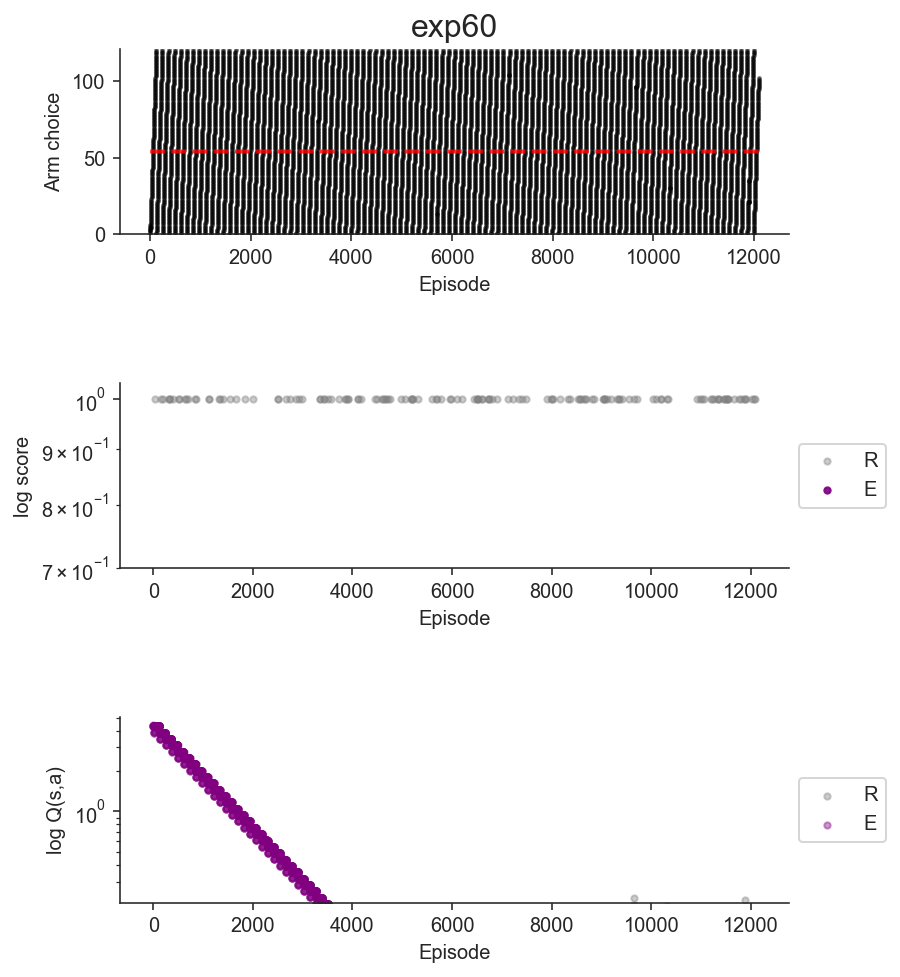

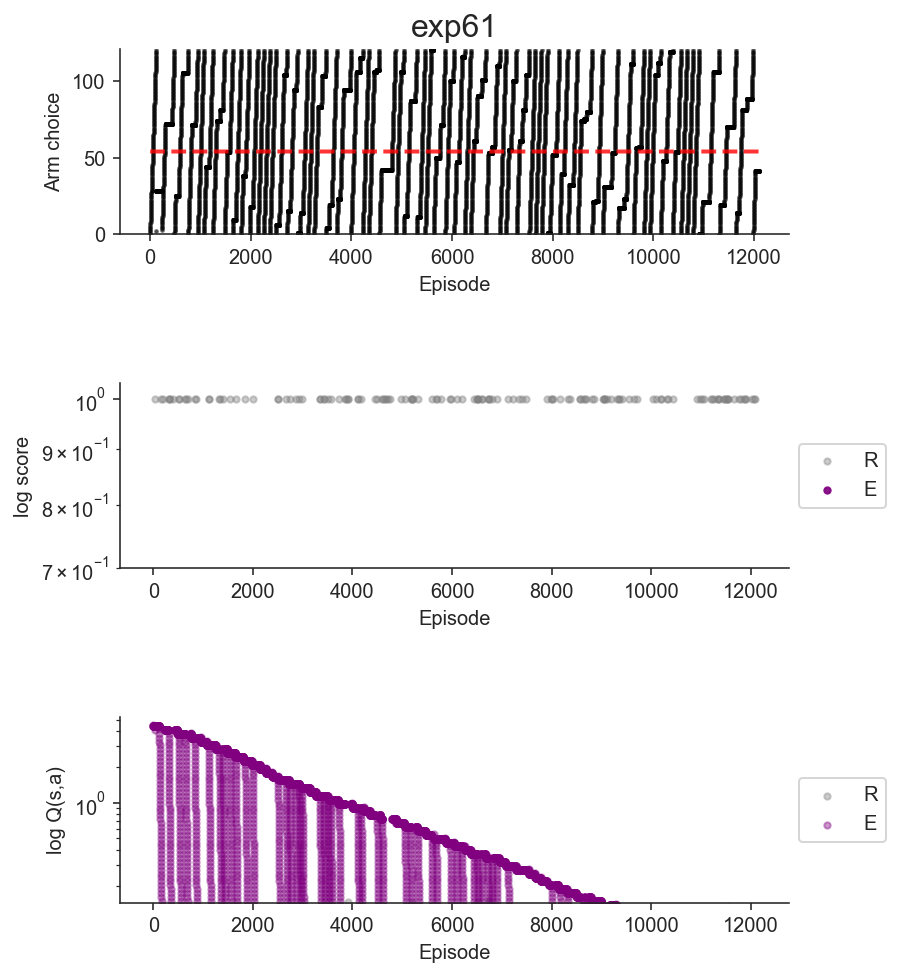

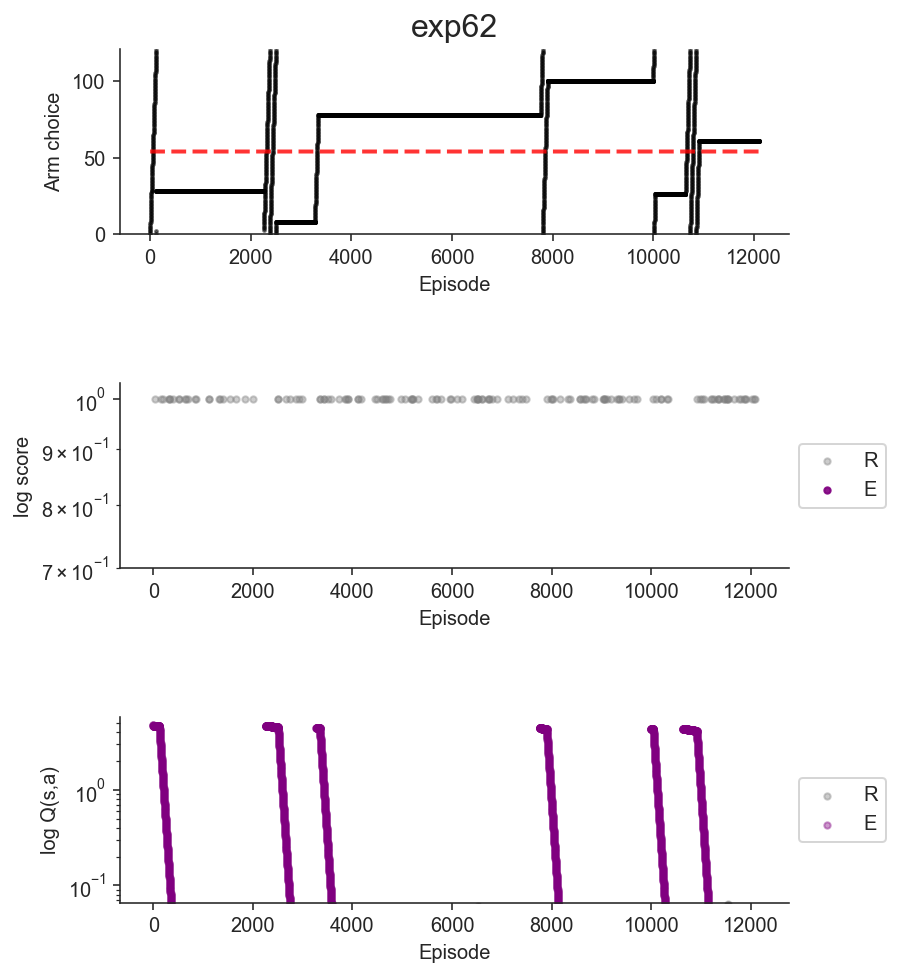

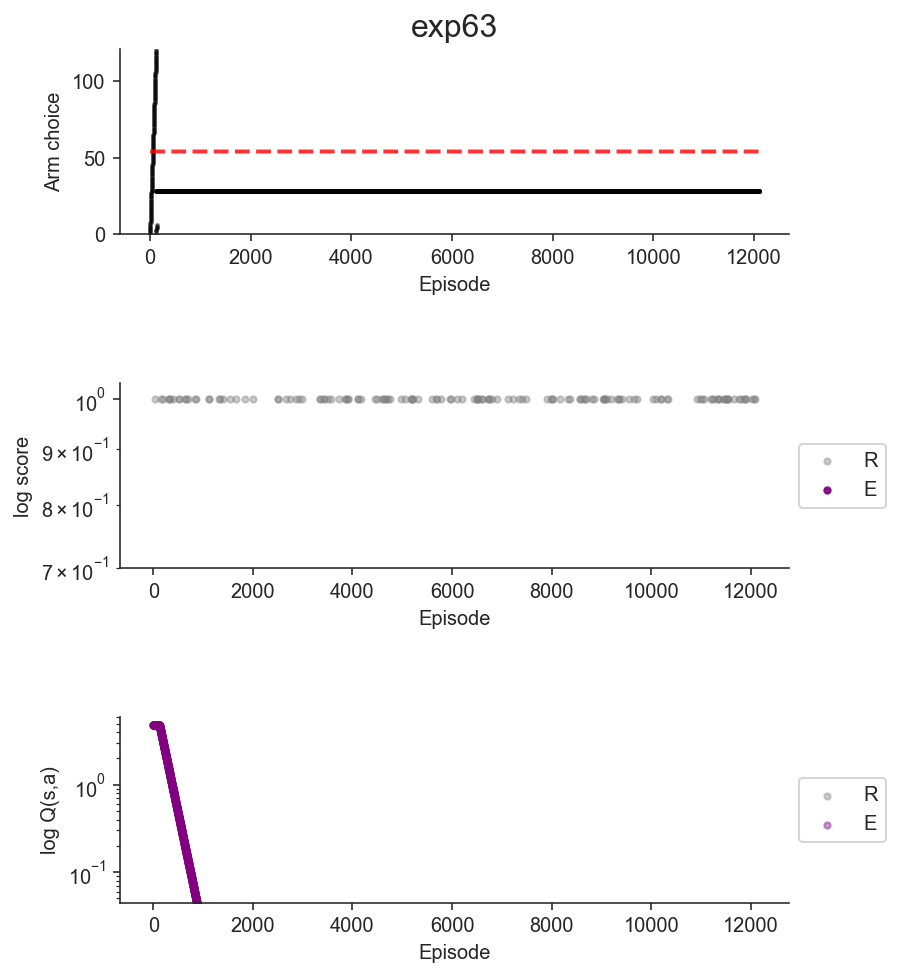

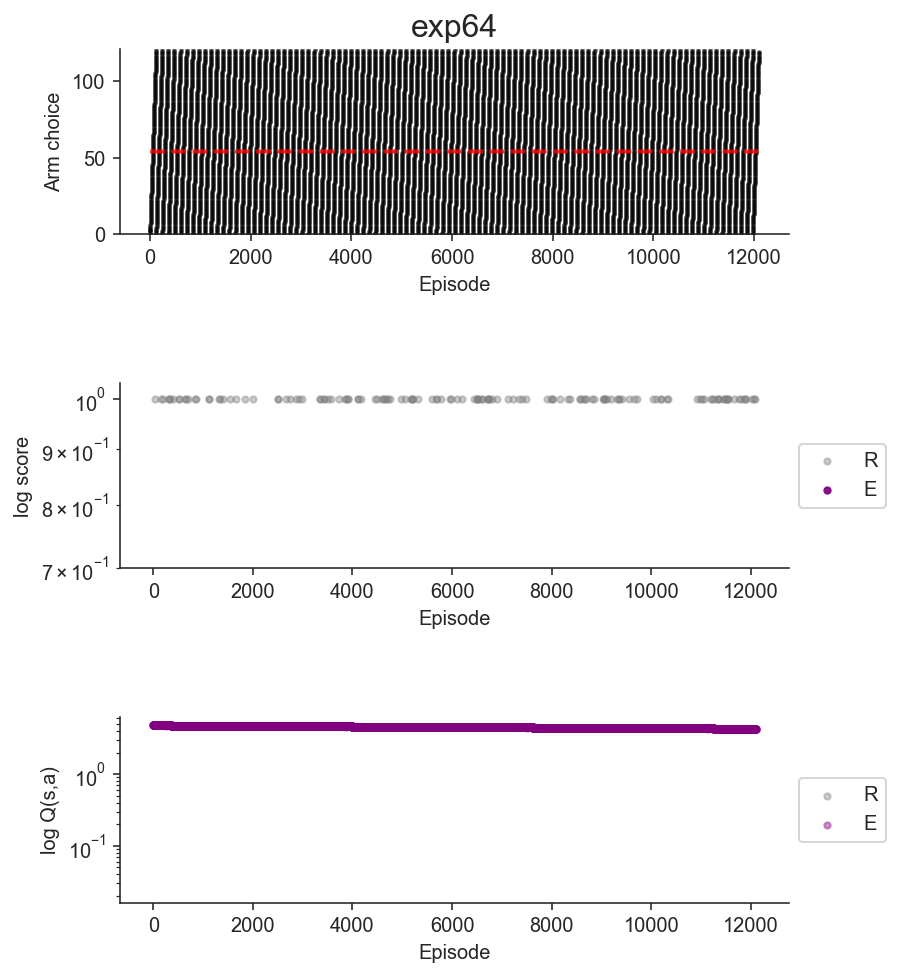

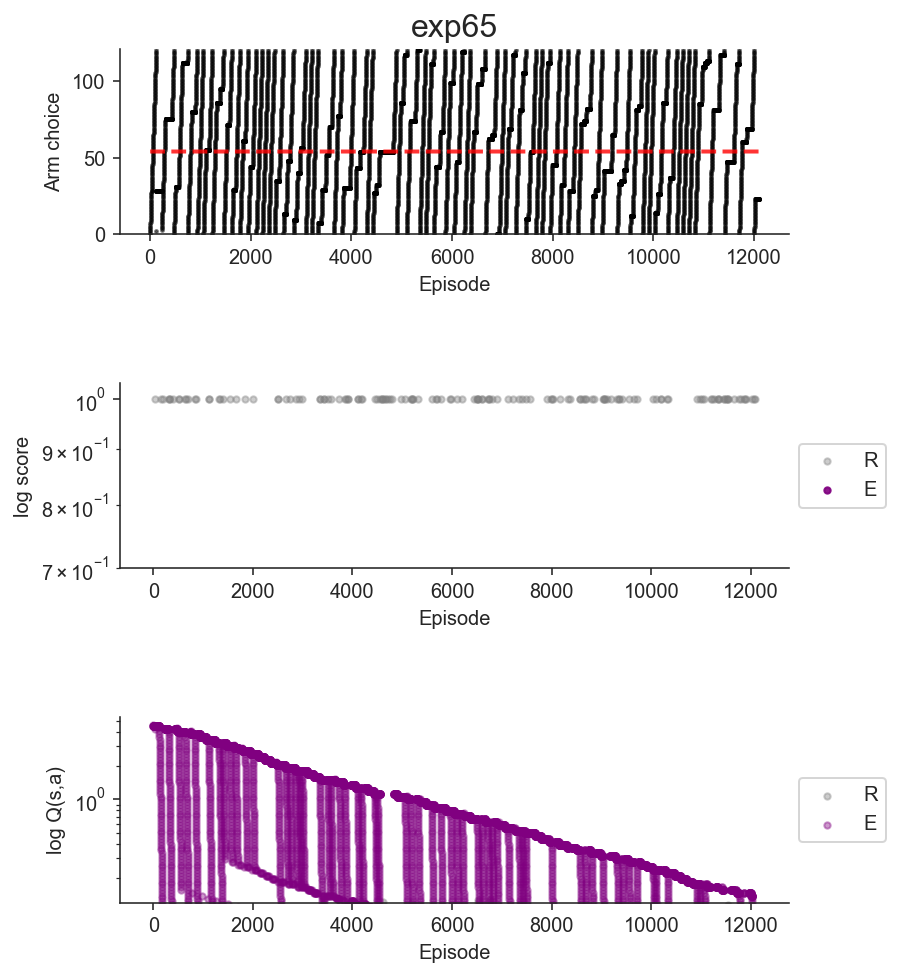

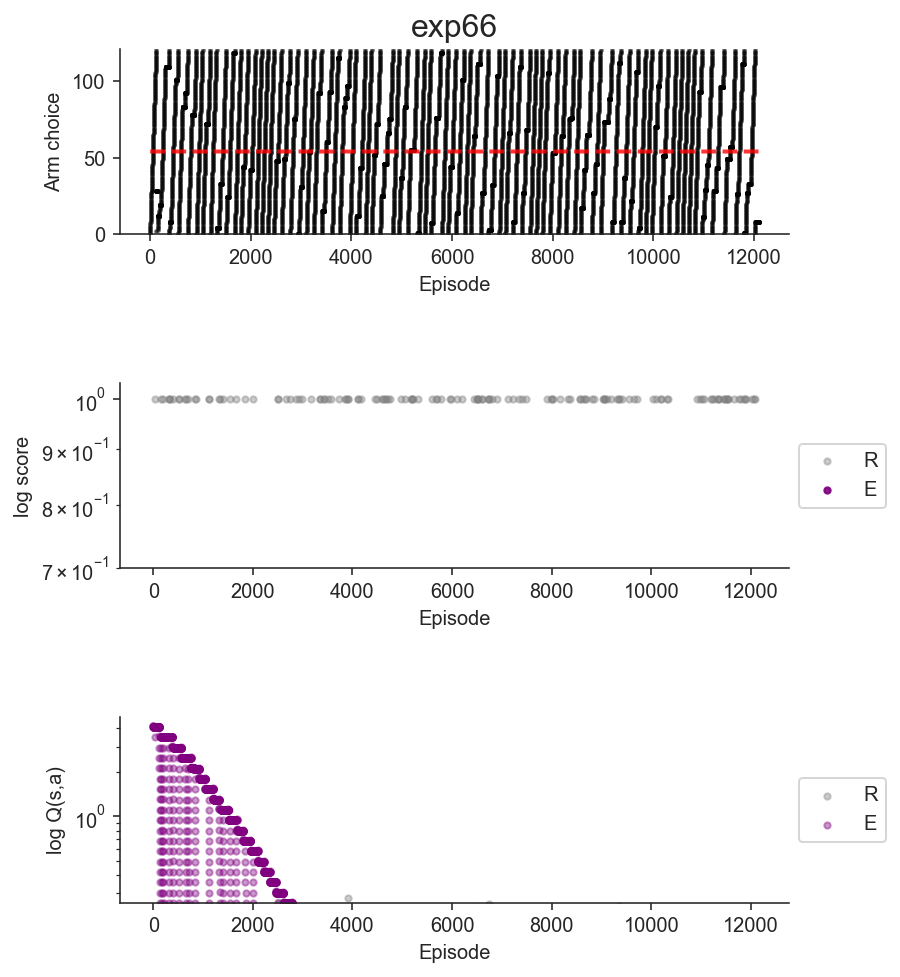

In [31]:
# Plot run
for exp_name, result in zip(exp_names, results):
    episodes = result["episodes"]
    actions =result["actions"]
    scores_R = result["scores_R"]
    values_R = result["values_R"]
    scores_E = result["scores_E"]
    values_E = result["values_E"]

    # Get some data from the gym...
    env = gym.make(env_name)
    best = env.env.best
    print(f"Best arm: {best}, last arm: {actions[-1]}")

    # Init plot
    fig = plt.figure(figsize=(6, 14))
    grid = plt.GridSpec(5, 1, wspace=0.3, hspace=0.8)

    # Do plots:
    # Arm
    plt.subplot(grid[0, 0])
    plt.title(exp_name)
    plt.scatter(episodes, actions, color="black", alpha=.5, s=2, label="Bandit")
    plt.plot(episodes, np.repeat(best, np.max(episodes)+1), 
             color="red", alpha=0.8, ls='--', linewidth=2)
    plt.ylim(-.1, np.max(actions)+1.1)
    plt.ylabel("Arm choice")
    plt.xlabel("Episode")

    # score
    plt.subplot(grid[1, 0])
    plt.scatter(episodes, scores_R, color="grey", alpha=0.4, s=10, label="R")
    plt.scatter(episodes, scores_E, color="purple", alpha=0.9, s=10, label="E")
    plt.ylabel("log score")
    plt.xlabel("Episode")
    plt.semilogy()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    _ = sns.despine()

    # Q
    plt.subplot(grid[2, 0])
    plt.scatter(episodes, values_R, color="grey", alpha=0.4, s=10, label="R")
    plt.scatter(episodes, values_E, color="purple", alpha=0.4, s=10, label="E")
    plt.ylabel("log Q(s,a)")
    plt.xlabel("Episode")
    plt.semilogy()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    _ = sns.despine()

    # -
    plt.savefig("figures/epsilon_bandit.pdf",  bbox_inches='tight')
    plt.savefig("figures/epsilon_bandit.eps",  bbox_inches='tight')

# Sensitivity

to parameter choices between all the different opt runs

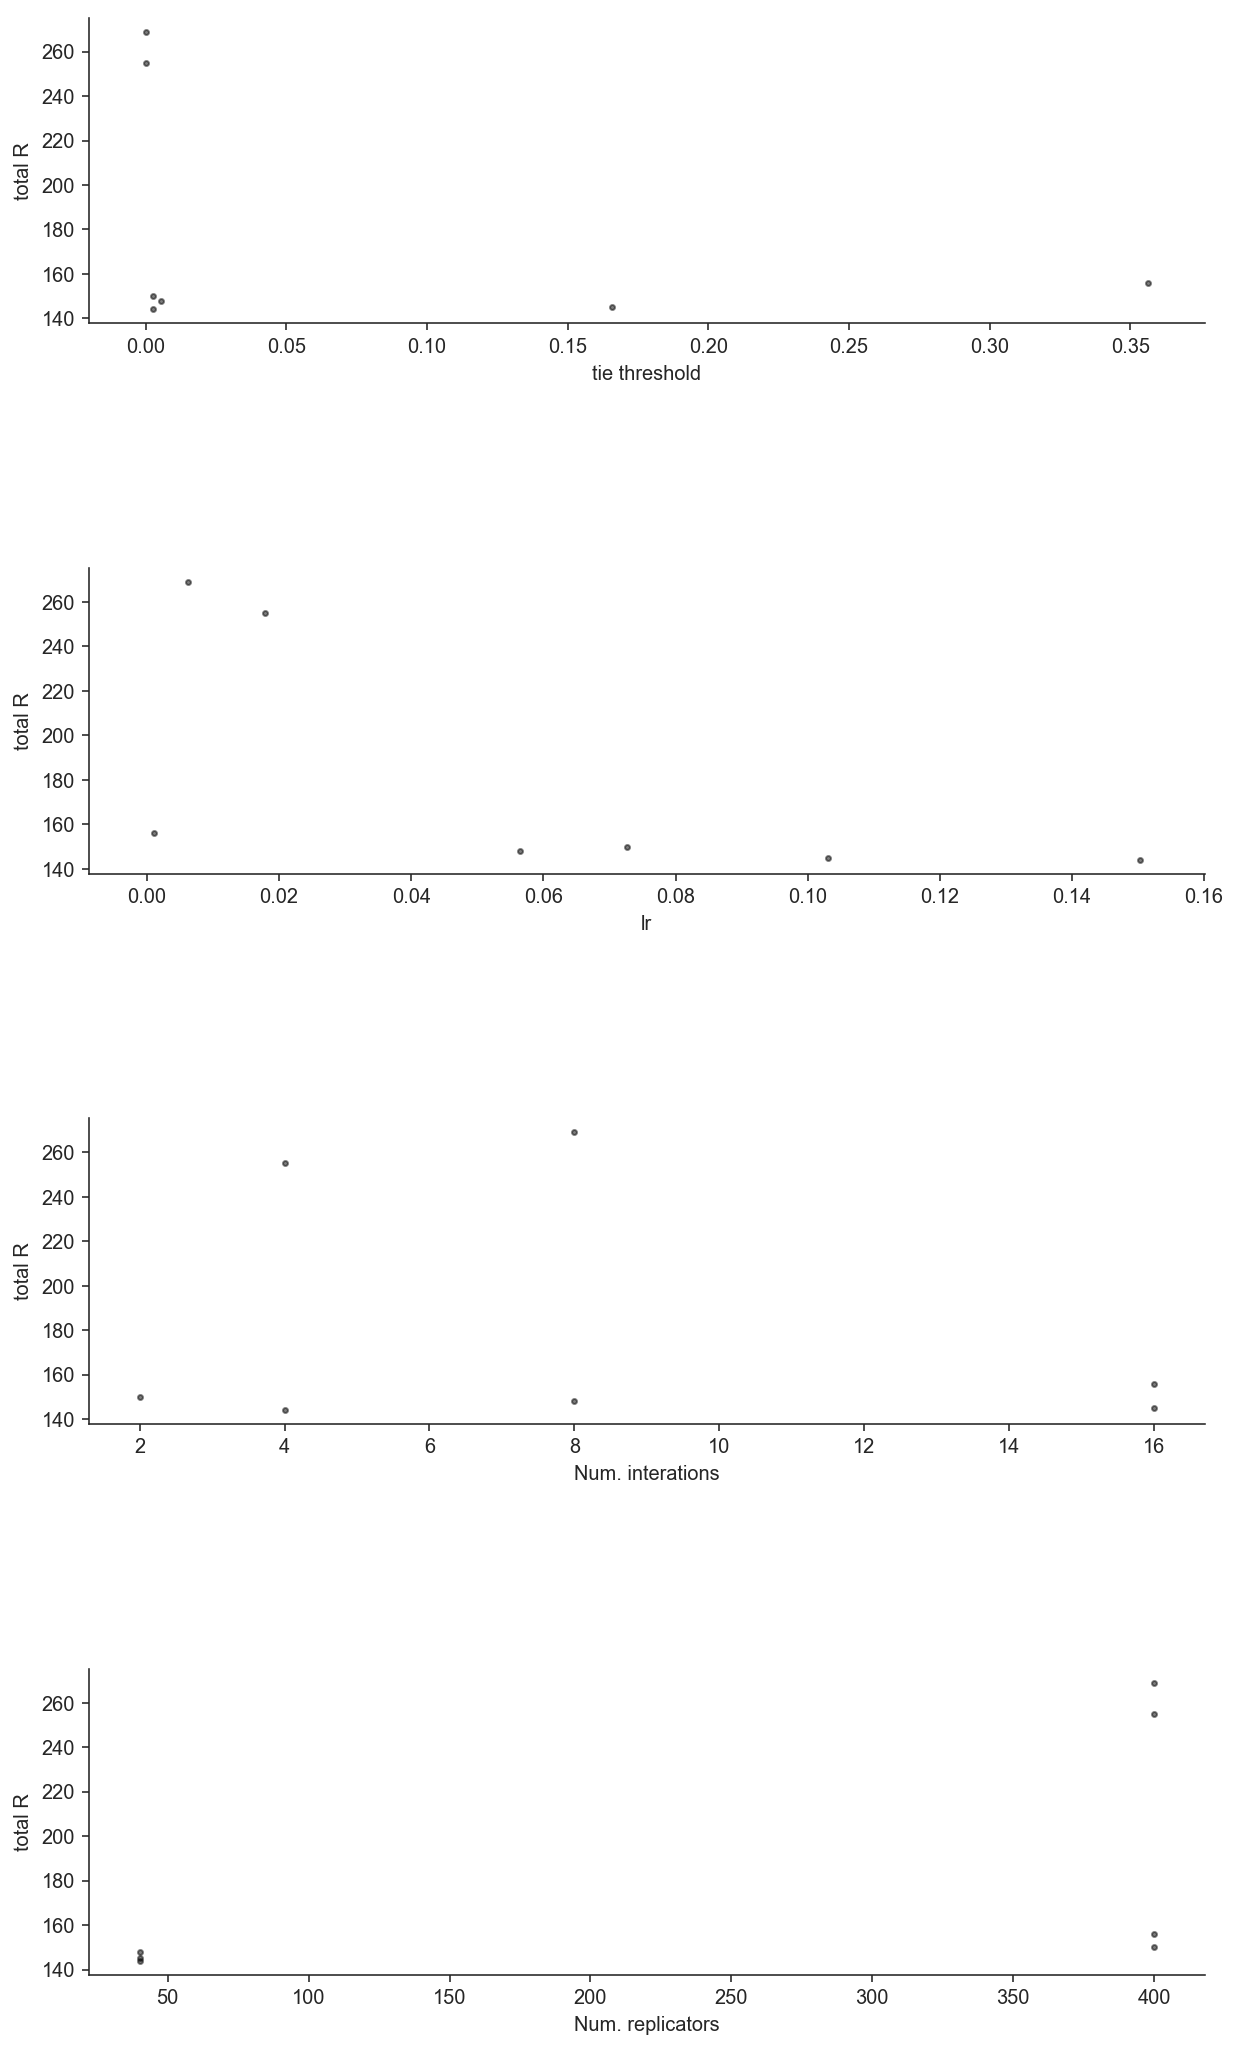

In [42]:
    # Init plot
fig = plt.figure(figsize=(10, 18))
grid = plt.GridSpec(4, 1, wspace=0.3, hspace=0.8)

# Do plots:
# Arm
plt.subplot(grid[0, 0])
plt.scatter(ties, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.xlabel("tie threshold")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[1, 0])
plt.scatter(lrs, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.ylabel("total R")
plt.xlabel("lr")
_ = sns.despine()

plt.subplot(grid[2, 0])
plt.scatter(num_iterations, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.xlabel("Num. interations")
plt.ylabel("total R")
_ = sns.despine()

plt.subplot(grid[3, 0])
plt.scatter(num_replicators, total_Rs, color="black", alpha=.5, s=6, label="total R")
plt.xlabel("Num. replicators")
plt.ylabel("total R")
_ = sns.despine()

# Distributions

of parameters

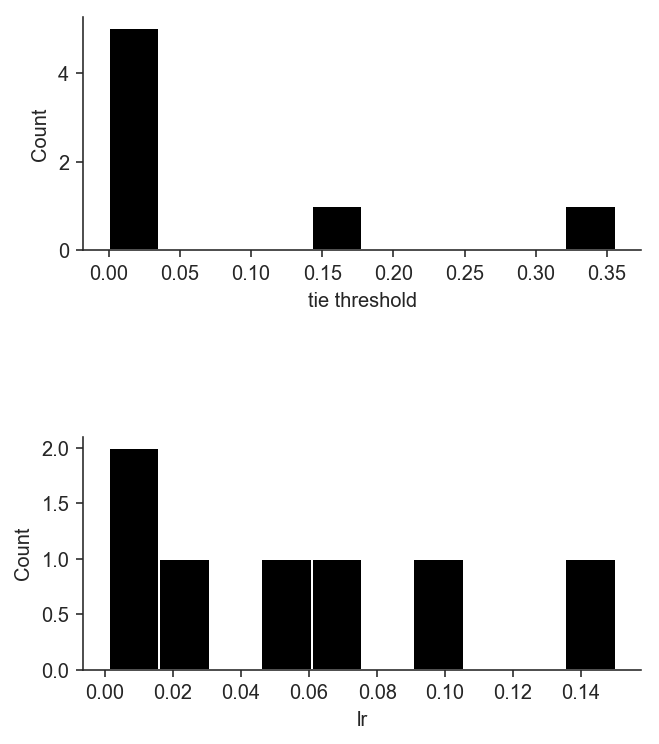

In [43]:
# Init plot
fig = plt.figure(figsize=(5, 6))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.hist(ties, color="black")
plt.xlabel("tie threshold")
plt.ylabel("Count")
_ = sns.despine()

plt.subplot(grid[1, 0])
plt.hist(lrs, color="black")
plt.xlabel("lr")
plt.ylabel("Count")
_ = sns.despine()

In [44]:
sorted(lrs)

[0.0010627443452795819,
 0.0062173732830179745,
 0.01779493281015575,
 0.05639062598500961,
 0.07271626759546117,
 0.10307028682373007,
 0.15023225971991971]

In [45]:
sorted(ties)

[1.3616067072219313e-05,
 0.00015718378208592088,
 0.0024617208672345187,
 0.002640357430892931,
 0.0054745921001018265,
 0.16590018881161991,
 0.3562939344967314]

of total reward

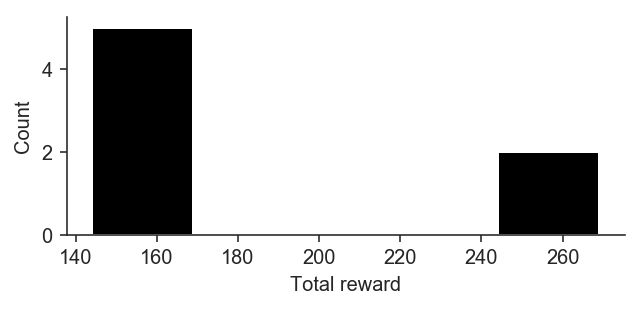

In [46]:
# Init plot
fig = plt.figure(figsize=(5, 2))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.hist(total_Rs, color="black", bins=5)
plt.xlabel("Total reward")
plt.ylabel("Count")
_ = sns.despine()

In [51]:
sorted(total_Rs)

[144.0, 145.0, 148.0, 150.0, 156.0, 255.0, 269.0]